## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [2]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [7]:
df = pd.read_csv("QueryResults.csv", header=0, names=["DATE", "TAG", "POSTS"])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [9]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,505
4,2008-08-01 00:00:00,c++,164


In [10]:
df.tail()

,DATE,TAG,POSTS
2365,2022-10-01 00:00:00,php,3825
2366,2022-10-01 00:00:00,python,23818
2367,2022-10-01 00:00:00,r,4638
2368,2022-10-01 00:00:00,ruby,443
2369,2022-10-01 00:00:00,swift,1778


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [18]:
df.shape

(2370, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [17]:
df.count()

DATE     2370
TAG      2370
POSTS    2370
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [22]:
df.groupby("TAG").sum()

,POSTS
TAG,
assembly,41406
c,387439
c#,1564572
c++,779653
delphi,50234
go,65286
java,1870795
javascript,2438306
perl,67198


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [23]:
df.groupby("TAG").count()

,DATE,POSTS
TAG,,
assembly,171,171
c,171,171
c#,172,172
c++,171,171
delphi,171,171
go,156,156
java,171,171
javascript,171,171
perl,171,171


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [27]:
print(pd.to_datetime(df.DATE[1]))
type(pd.to_datetime(df.DATE[1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [28]:
df.DATE = pd.to_datetime(df.DATE)

In [29]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,505
4,2008-08-01,c++,164


## Data Manipulation



In [33]:
reshaped_df = df.pivot(index="DATE", columns="TAG", values="POSTS")

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,164.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1646.0,753.0,104.0,NaN,1131.0,635.0,130.0,476.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1988.0,808.0,112.0,NaN,1149.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1731.0,734.0,141.0,NaN,957.0,581.0,97.0,501.0,451.0,1.0,158.0,NaN


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [35]:
reshaped_df.shape

(172, 14)

In [40]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [39]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,505.0,164.0,14.0,NaN,222.0,164.0,28.0,158.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1646.0,753.0,104.0,NaN,1131.0,635.0,130.0,476.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1988.0,808.0,112.0,NaN,1149.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1731.0,734.0,141.0,NaN,957.0,581.0,97.0,501.0,451.0,1.0,158.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [41]:
reshaped_df.count()

TAG
assembly      171
c             171
c#            172
c++           171
delphi        171
go            156
java          171
javascript    171
perl          171
php           171
python        171
r             169
ruby          171
swift         163
dtype: int64

In [42]:
reshaped_df.fillna(0, inplace=True)

In [43]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,505.0,164.0,14.0,0.0,222.0,164.0,28.0,158.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,318.0,1646.0,753.0,104.0,0.0,1131.0,635.0,130.0,476.0,537.0,6.0,287.0,0.0
2008-10-01,15.0,303.0,1988.0,808.0,112.0,0.0,1149.0,724.0,127.0,612.0,508.0,0.0,247.0,0.0
2008-11-01,17.0,259.0,1731.0,734.0,141.0,0.0,957.0,581.0,97.0,501.0,451.0,1.0,158.0,0.0


In [44]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [45]:
import matplotlib.pyplot as plt

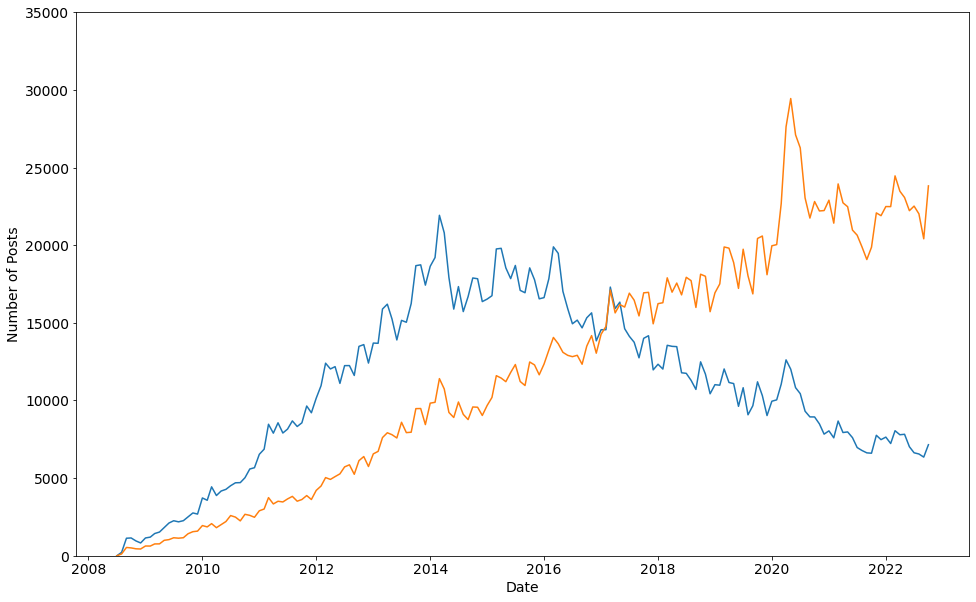

In [64]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df["java"])
plt.plot(reshaped_df.index, reshaped_df["python"])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

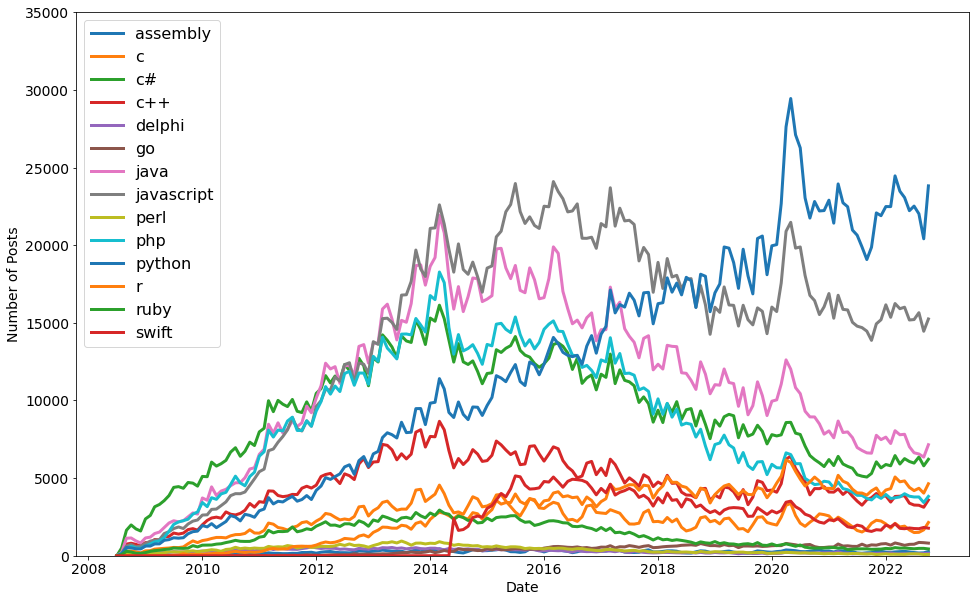

In [67]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)
plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

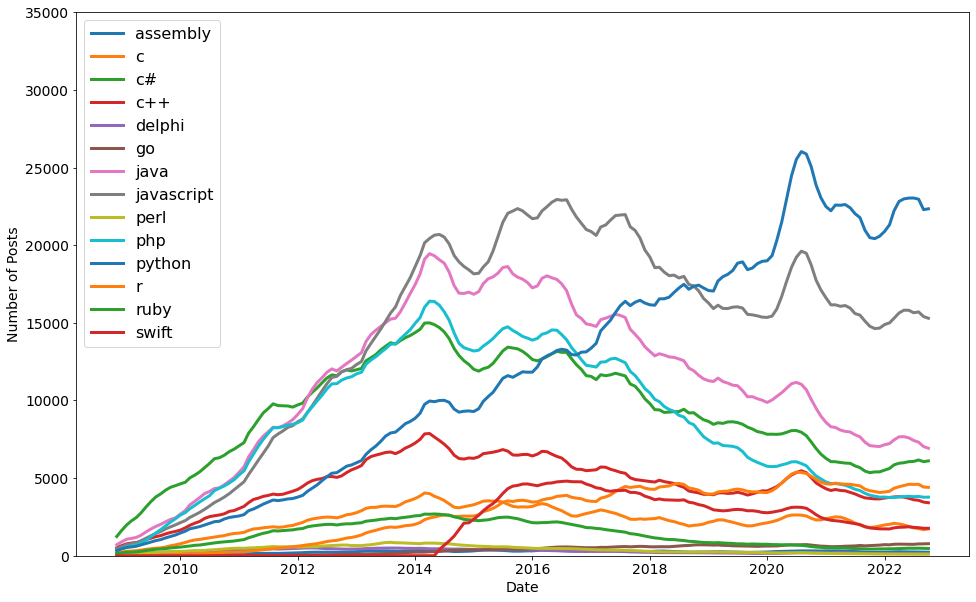

In [71]:
roll_df = reshaped_df.rolling(window=6).mean()
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Posts", fontsize=14)
plt.ylim(0, 35000)
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column], linewidth=3, label=roll_df[column].name)
plt.legend(fontsize=16)